In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings("ignore")

In [13]:
df= pd.read_csv("C:\\Users\\HP\\Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [15]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [16]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [17]:
df['furnishingstatus'].unique(),df['mainroad'].unique(),df['guestroom'].unique(),df['basement'].unique(),df['hotwaterheating'].unique(),df['airconditioning'].unique(),df['prefarea'].unique()

(array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object),
 array(['yes', 'no'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['yes', 'no'], dtype=object),
 array(['yes', 'no'], dtype=object))

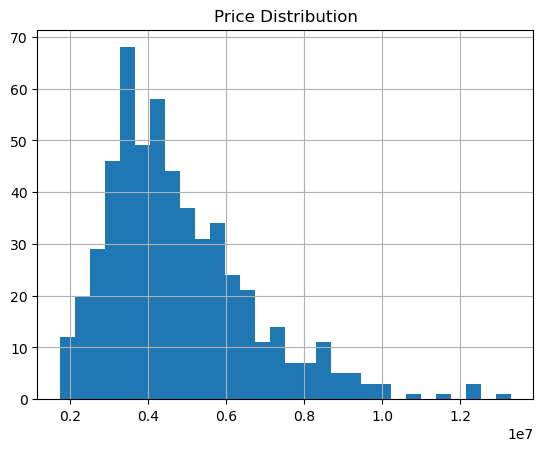

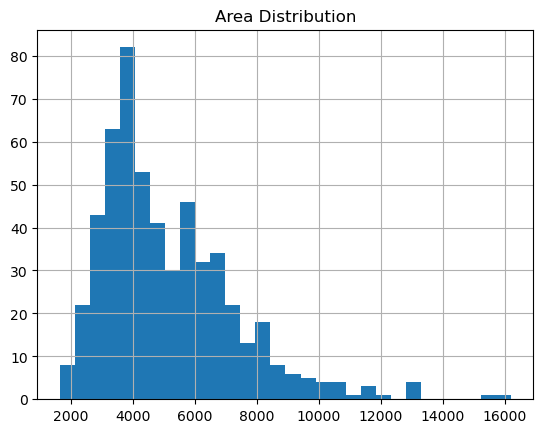

In [18]:
df['price'].hist(bins=30)
plt.title('Price Distribution')
plt.show()

df['area'].hist(bins=30)
plt.title('Area Distribution')
plt.show()

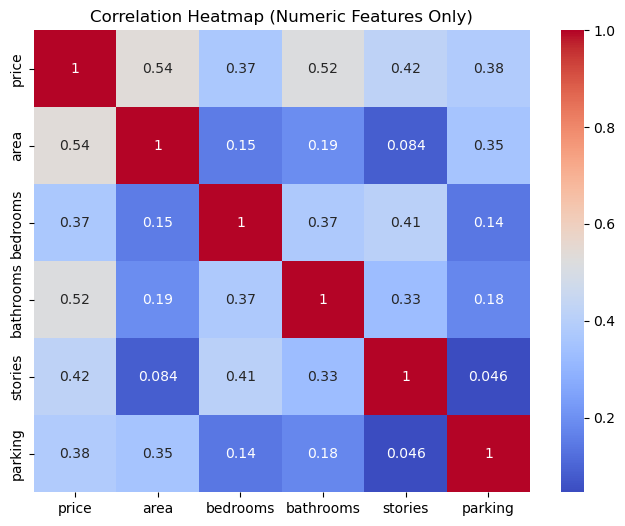

In [19]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()


In [11]:
BINARY_COLS = ['mainroad', 'guestroom', 'basement',
               'hotwaterheating', 'airconditioning', 'prefarea']
def preprocess_features(df_raw: pd.DataFrame):
    df = df_raw.copy()

    X = df.drop("price", axis=1)
    y = df["price"].copy()
    for col in BINARY_COLS:
        X[col] = X[col].map({"yes": 1, "no": 0})

    
    X = pd.get_dummies(X, columns=["furnishingstatus"], drop_first=True)

    return X, y
X, y = preprocess_features(df)
print("Processed feature columns:", X.columns.tolist())


Processed feature columns: ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred_lr = lr.predict(X_test)

In [25]:
print("Linear Regression Performance")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("R²:", r2_score(y_test, y_pred_lr))
cv_scores = cross_val_score(
    lr, X_train, y_train,
    cv=5,
    scoring="neg_root_mean_squared_error"
)
print("CV RMSE (mean):", -cv_scores.mean())
print("CV RMSE (std):", cv_scores.std())

Linear Regression Performance
MAE: 970043.403920164
RMSE: 1324506.9600914388
R²: 0.6529242642153184
CV RMSE (mean): 1021776.370453079
CV RMSE (std): 136428.92847973245


In [32]:
rf_base = RandomForestRegressor(
    random_state=42,   # FIXED
    n_jobs=-1
)

param_distributions = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"]
}

rf_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=42,   # FIXED
    n_jobs=-1,
    verbose=1
)

rf_search.fit(X_train, y_train)

print("\nBest RF Params:", rf_search.best_params_)
best_rf = rf_search.best_estimator_

y_pred_rf = best_rf.predict(X_test)

print("Random Forest Performance (Test Set)")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("R²:", r2_score(y_test, y_pred_rf))


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best RF Params: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20}
Random Forest Performance (Test Set)
MAE: 1038383.1683824593
RMSE: 1420710.9108745516
R²: 0.6006743612413638


In [29]:
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

if rmse_rf < rmse_lr:
    best_model = best_rf
    best_name = "RandomForestRegressor (tuned)"
else:
    best_model = lr
    best_name = "LinearRegression"

print(f"Selected production model: {best_name}")

Selected production model: LinearRegression


In [30]:
joblib.dump(best_model, "linear_regression_model.pkl")
joblib.dump(X.columns.tolist(), "model_columns.pkl")

['model_columns.pkl']

In [31]:
print("\nArtifacts saved: 'linear_regression_model.pkl', 'model_columns.pkl', 'random_forest_model.pkl'")


Artifacts saved: 'linear_regression_model.pkl', 'model_columns.pkl', 'random_forest_model.pkl'


In [26]:
print("Random Forest Performance")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("R²:", r2_score(y_test, y_pred_rf))

Random Forest Performance
MAE: 1014947.3230122325
RMSE: 1399769.443949671
R²: 0.6123598247296523


In [27]:
joblib.dump(rf, "random_forest_model.pkl")

['random_forest_model.pkl']